In [28]:
from contour_analysis import contour_compute
from facet_analysis import facet_compute
import matplotlib.pyplot as plt
from length_analysis import *

c:\Users\mtayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\mtayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\mtayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\mtayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\mtayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[(0, 0), (505, 0), (350, 0), (376, 272)]
(0, 0)
Removed facet of size (2182.1931206811805, 158.89575447066824)
(505, 0)
Removed facet of size (696.3718375230966, 58.227804189765976)
(350, 0)
(376, 272)
Removed facet of size (1461.1526075116747, 95.74444854972398)
[(0, 0), (505, 0), (350, 0), (376, 272)]
(0, 0)
Removed facet of size (2190.2778126997273, 159.217701512391)
(505, 0)
Removed facet of size (705.389378620746, 58.54975123148872)
(350, 0)
(376, 272)
Removed facet of size (1487.1687318278816, 96.61599356955456)


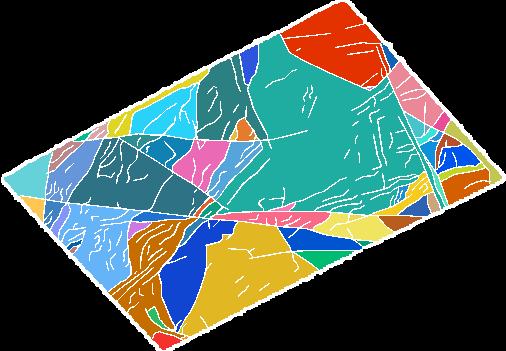

In [29]:
contour_frac_img = contour_compute(
        "images/Rhadamanthys-fractures.png",
        0.2276509363851,
        0.2276509363851,
        "km",
        "Rhadamanthys",
        "Rhadamanthys.tif",
        (0, 0),
        (505, 350),
    )
contour_frac_img.flood_count()
contour_frac_img.remove_facets([(0, 0), (505, 0), (350, 0), (376, 272)])

frac_img = facet_compute(
        "images/Rhadamanthys-fractures.png",
        0.2276509363851,
        0.2276509363851,
        "km",
        "Rhadamanthys",
        (0, 0),
        None,
    )
frac_img.flood_count()
frac_img.remove_facets([(0, 0), (505, 0), (350, 0), (376, 272)])
contour_frac_img.get_image()

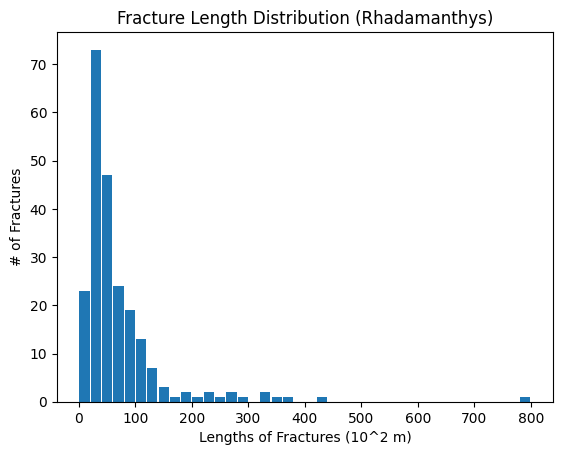

In [30]:
# Fracure Length
lengths = fracture_data_transform("Rhad-fracture-lengths-copy.csv")
nums = {k: v for k, v in count(lengths, bucket_size).items() if v > threshold}

x = [bucket_size * (length + 0.5) for length in nums.keys()]

errors = []
y = nums.values()
plt.bar(x, y, width=bucket_size * 0.9)
# plt.errorbar(x, y, xerr=errors, fmt="o", color="r", xscale="log")
plt.title(f"Fracture Length Distribution ({image_name})")
plt.xlabel("Lengths of Fractures (10^2 m)")
plt.ylabel("# of Fractures")
plt.show()

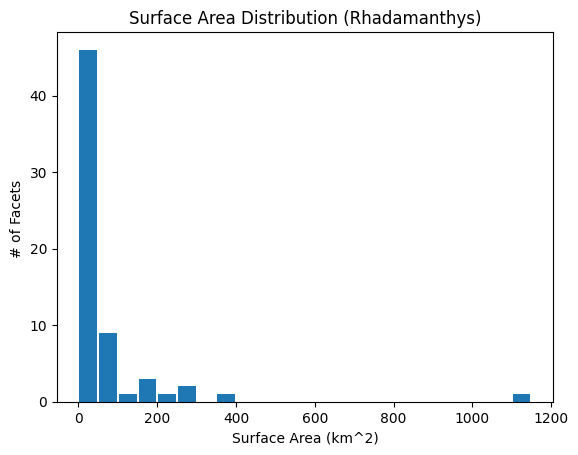

In [31]:
# Surface Areas
contour_frac_img.analyze_surface_area(50, 0)

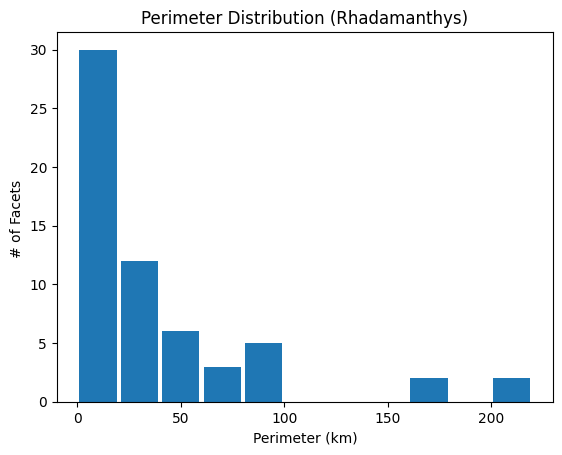

In [32]:
# Perimeter Distribution
contour_frac_img.analyze_perimeter(20, 2)

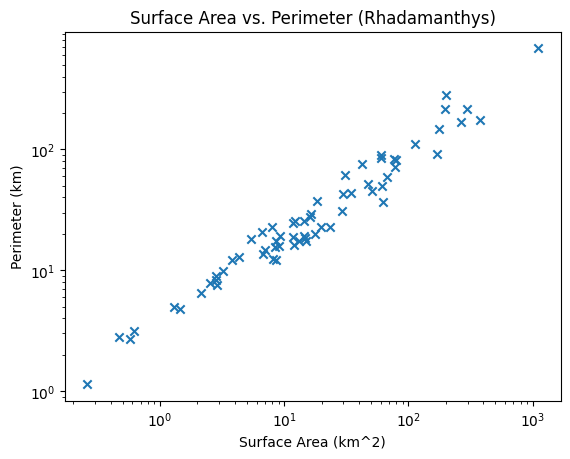

In [33]:
# Surface Area vs Perimeter
contour_frac_img.perimeter_vs_surface()

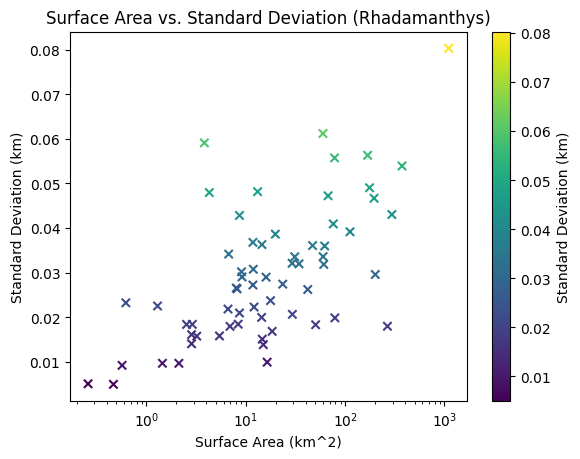

In [34]:
# Elevation Correction
contour_frac_img.elev_deviations_vs_surface_area()

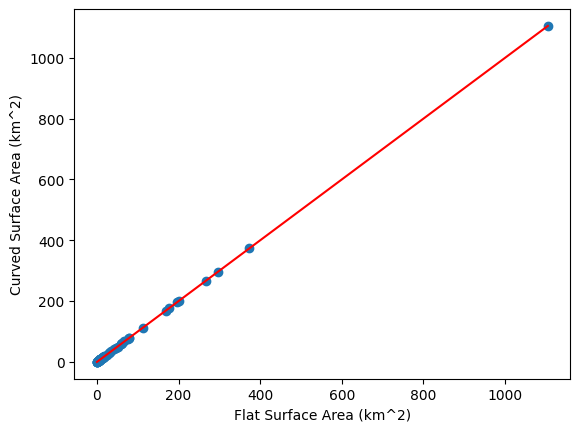

In [35]:
# Flat vs. corrected
flat, corrected = [], []
max = 0
for key in contour_frac_img.data:
    flat.append(frac_img.data[key][0])
    corrected.append(contour_frac_img.data[key][0])
    if contour_frac_img.data[key][0] > max:
        max = contour_frac_img.data[key][0]

fig, ax = plt.subplots()
ax.scatter(flat, corrected)
ax.set_xlabel("Flat Surface Area (km^2)")
ax.set_ylabel("Curved Surface Area (km^2)")
ax.plot([0, max], [0, max], "red") # Overlay y = x
plt.show()

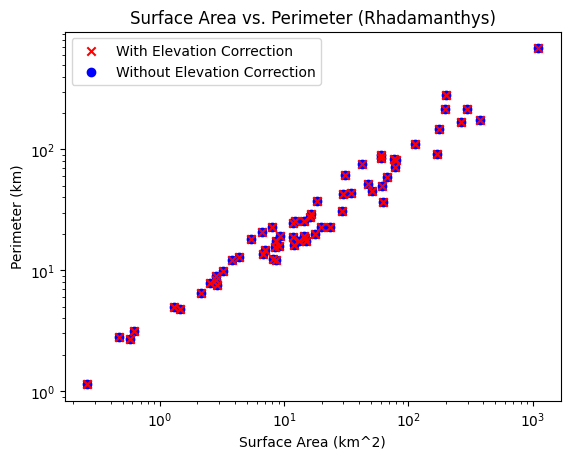

In [36]:
x_1, y_1 = [], []
for arr in contour_frac_img.data.values():
    x_1.append(arr[0])
    y_1.append(arr[1])

x_2, y_2 = [], []
for arr in frac_img.data.values():
    x_2.append(arr[0])
    y_2.append(arr[1])

fig, ax = plt.subplots()
ax.set_title(f"Surface Area vs. Perimeter (Rhadamanthys)")
ax.scatter(x_1, y_1, marker="x", c="r", label="With Elevation Correction")
ax.scatter(x_2, y_2, marker="o", c="b", label="Without Elevation Correction")
ax.set_xlabel(f"Surface Area (km^2)")
ax.set_xscale("log")
ax.set_ylabel(f"Perimeter (km)")
ax.set_yscale("log")
ax.scatter(x_1, y_1, c="r", marker="x")
ax.legend()
plt.show()